In [38]:
import matplotlib.pyplot as plt
import glob

In [39]:
%matplotlib inline

In [40]:
cache_glob = glob.glob(
    "/home/xyhang/projects/VCIP2023-grand-challenge/cache/PSNR/*/*/*/b_e.npz"
)
import random
random.shuffle(cache_glob)
cache_glob = cache_glob[:1000]

print(len(cache_glob))

1000


In [41]:
import site
site.addsitedir("/home/xyhang/projects/VCIP2023-grand-challenge/")

from src.math_utils import FitKExp

In [42]:
import tqdm
import numpy as np

R2_results = [[], [], [], [], []]
maxerror_results = [[], [], [], [], []]

for filename in tqdm.tqdm(cache_glob):
    curve = FitKExp.load(filename)
    X = curve.X
    Y = curve.Y
    fitters = list([FitKExp(X=X, Y=Y, K=i, retry=False) for i in range(1, 6)])
    for i, fitter in enumerate(fitters):
        R2_results[i].append(fitter.R2(fitter.curve))
        maxerror_results[i].append(fitter.maxerror(fitter.curve))

  0%|          | 0/1000 [00:00<?, ?it/s]/home/xyhang/anaconda3/envs/SARDCO/lib/python3.9/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
100%|██████████| 1000/1000 [16:07<00:00,  1.03it/s]


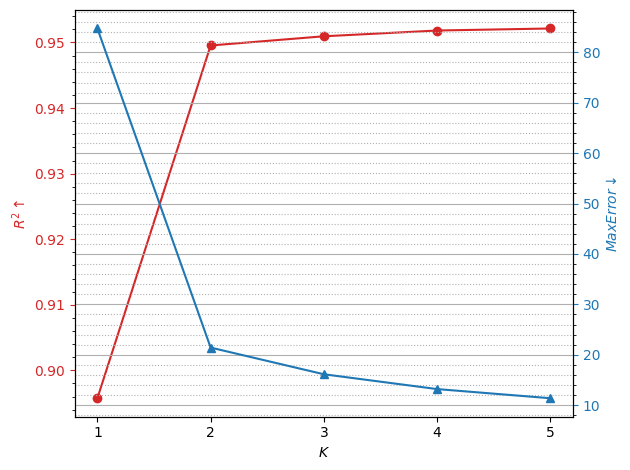

In [43]:
fig, ax1 = plt.subplots()

color1 = 'tab:red'
color2 = 'tab:blue'

ax1.set_xlabel("$K$")
ax2 = ax1.twinx()

ax1.set_ylabel(r"$R^2\uparrow$", color=color1)
ax1.tick_params(axis='y', colors=color1)
ax1.tick_params(axis="x", which="minor", bottom=False)

ax2.set_ylabel(r"$Max Error \downarrow$", color=color2)
ax2.tick_params(axis="y", colors=color2)

ax1.minorticks_on()
ax2.minorticks_on()

ax1.plot(range(1,6), [np.mean(R2_results[i]) for i in range(5)], color=color1, marker='o', label='$R^2$')
ax2.plot(range(1,6), [np.mean(maxerror_results[i]) for i in range(5)], color=color2, marker='^', label='Max Error')

fig.tight_layout()

plt.xticks([1,2,3,4,5])

plt.grid(which='major', axis='y', linestyle='-')
plt.grid(which='minor', axis='y', linestyle=':')

plt.savefig('./K_Exp.png', dpi=300)
plt.savefig('./K_Exp.pdf')